In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding the Data

In [4]:
data = pd.read_csv('Netflix_Userbase.csv')

In [5]:
data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [7]:
data.shape

(2500, 10)

In [8]:
data.sample(5)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
1839,1840,Basic,14,15-09-22,08-07-23,United States,40,Male,Laptop,1 Month
1530,1531,Premium,12,21-09-22,05-07-23,France,30,Female,Tablet,1 Month
1471,1472,Basic,14,21-10-22,06-07-23,Brazil,28,Female,Laptop,1 Month
986,987,Premium,11,30-10-22,01-07-23,Canada,32,Female,Tablet,1 Month
1790,1791,Premium,14,01-07-22,06-07-23,Spain,45,Male,Laptop,1 Month


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [10]:
data.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [11]:
data.describe

<bound method NDFrame.describe of       User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0           1             Basic               10  15-01-22          10-06-23   
1           2           Premium               15  05-09-21          22-06-23   
2           3          Standard               12  28-02-23          27-06-23   
3           4          Standard               12  10-07-22          26-06-23   
4           5             Basic               10  01-05-23          28-06-23   
...       ...               ...              ...       ...               ...   
2495     2496           Premium               14  25-07-22          12-07-23   
2496     2497             Basic               15  04-08-22          14-07-23   
2497     2498          Standard               12  09-08-22          15-07-23   
2498     2499          Standard               13  12-08-22          12-07-23   
2499     2500             Basic               15  13-08-22          12-07-23   

     

In [12]:
data.duplicated().sum()

0

# Processing the Data

In [15]:
#Converting subscription type to categorical column
data['Subscription Type'] = pd.Categorical(data['Subscription Type'], ordered=True, categories=['Basic','Standard','Premium'])
#Converting join date to a datetime data type
data['Join Date'] = pd.to_datetime(data['Join Date'])
data.info()

C:\Users\91832\AppData\Local\Temp\ipykernel_20412\3905032675.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Join Date'] = pd.to_datetime(data['Join Date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   category      
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   object        
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(3), object(5)
memory usage: 178.5+ KB


In [16]:
#Converting last payment date to datetime data type
data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'])
#Converting the country and gender column to categorical
data['Country'] = data['Country'].astype('category')
data['Gender'] = data['Gender'].astype('category')
#Converting Device to categorical column
data['Device'] = pd.Categorical(data['Device'], ordered=True, categories=['Smartphone','Tablet','Laptop','Smart TV'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   category      
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   category      
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   category      
 8   Device             2500 non-null   category      
 9   Plan Duration      2500 non-null   object        
dtypes: category(4), datetime64[ns](2), int64(3), object(1)
memory usage: 127.9+ KB


C:\Users\91832\AppData\Local\Temp\ipykernel_20412\3960906589.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'])


# Analysing the data

Text(0, 0.5, '')

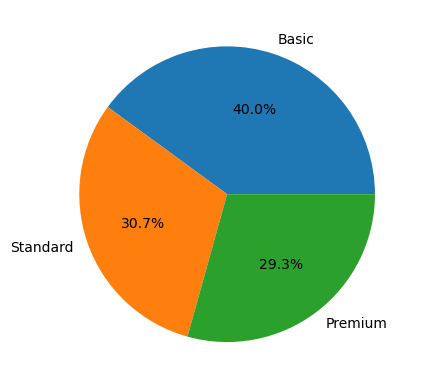

In [29]:
#PieChart to see which plan was mostly purchased

data['Subscription Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("")

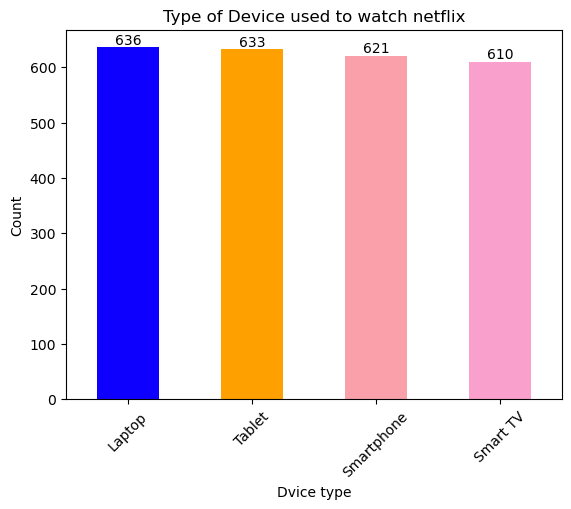

In [19]:
#Barplot to see which device was mostly used.

ax = data['Device'].value_counts().plot(kind='bar', color=['#0E00FF','#FDA000' ,'#FAA0AA','#FAA0CC'])
plt.xticks(rotation=45)
plt.title('Type of Device used to watch netflix')
plt.xlabel('Dvice type')
plt.ylabel('Count')
for i in ax.containers:
    ax.bar_label(i,)

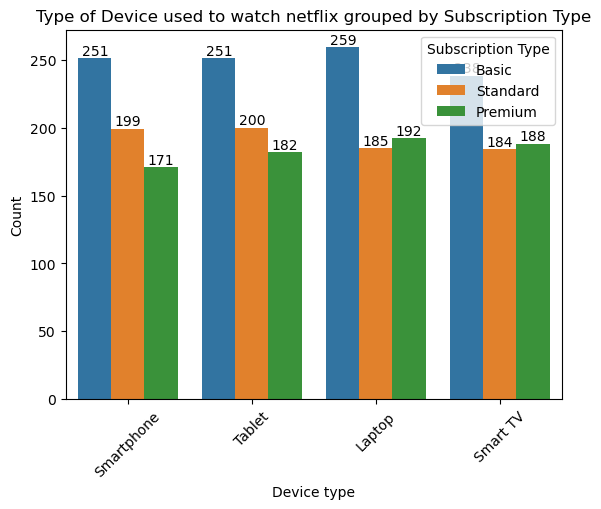

In [20]:
#Barplot to see which device was used for each plan.

ax = sns.countplot(data=data, x='Device', hue='Subscription Type')
plt.xticks(rotation=45)
plt.title('Type of Device used to watch netflix grouped by Subscription Type')
plt.xlabel('Device type')
plt.ylabel('Count')
for i in ax.containers:
    ax.bar_label(i,)

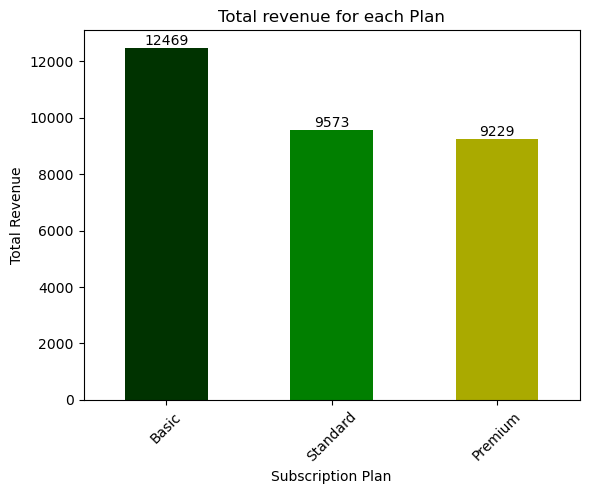

In [21]:
#Bar plot for total revenue for each subscription type
ax = data.groupby('Subscription Type')['Monthly Revenue'].agg('sum').plot(kind='bar', color=['#030','#017F00' ,'#AAAA00'])
plt.xticks(rotation=45)
plt.title('Total revenue for each Plan')
plt.xlabel('Subscription Plan')
plt.ylabel('Total Revenue')
for i in ax.containers:
    ax.bar_label(i,)

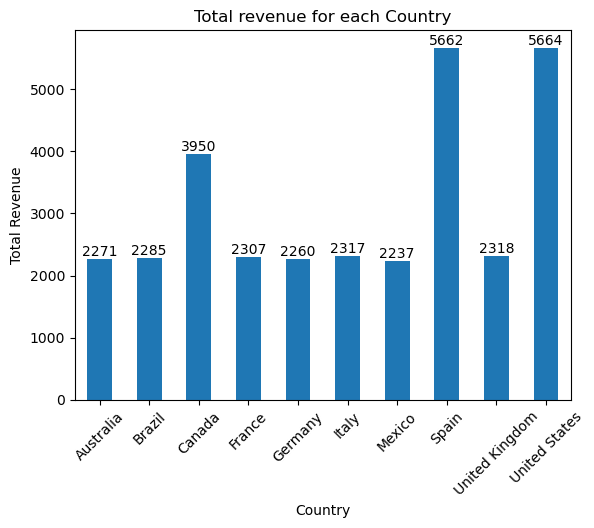

In [22]:
#Bar plot for total revenue for each country
ax = data.groupby('Country')['Monthly Revenue'].agg('sum').plot(kind='bar')
plt.title('Total revenue for each Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i,)

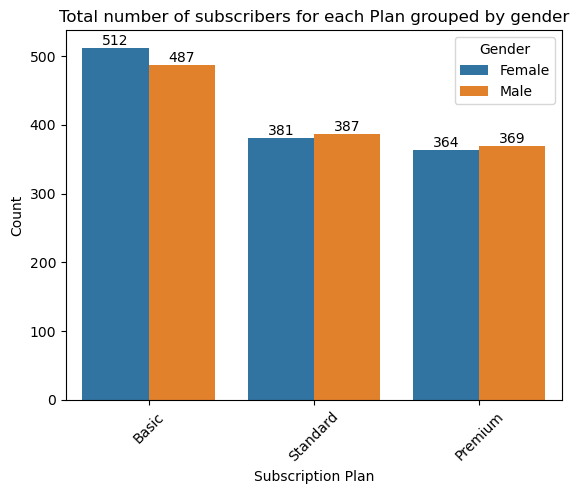

In [30]:
#Barplot to see which plan was mostly purchased grouped by gender.

ax = sns.countplot(data=data, x='Subscription Type', hue='Gender')
plt.xticks(rotation=45)
plt.title('Total number of subscribers for each Plan grouped by gender')
plt.xlabel('Subscription Plan')
plt.ylabel('Count')
for i in ax.containers:
    ax.bar_label(i,)